# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

**Read data**

In [ ]:
df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


**Check data**

In [ ]:
df.isnull().sum()
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [ ]:
# Check duplicate
df.duplicated(subset = 'user id').sum()

np.int64(0)

In [ ]:
# Drop column: Drop cột Unamed và User ID vì User ID sẽ không phải là yếu tố để dụ đoán
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)


In [ ]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
# Create a list of categorical variables
df_cate = df[['test group','converted', 'most ads day', 'most ads hour']]
df_cate.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [ ]:
for i in df_cate.columns:
  print(i.upper(), ":", df_cate[i].unique())


TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate Analysis

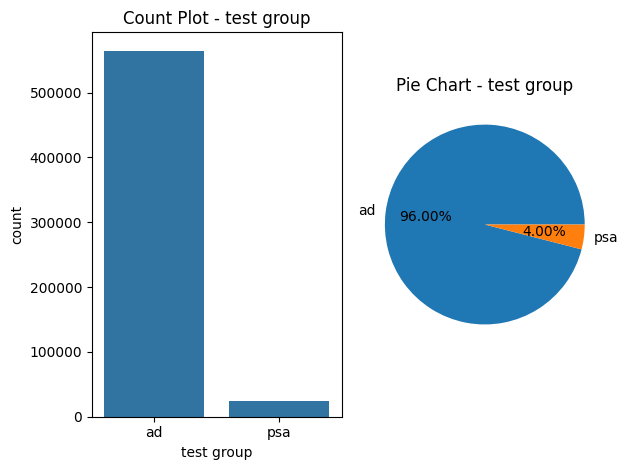

In [ ]:
variable = 'test group'
# Bar chart
plt.subplot(1,2,1)
sns.countplot( x= variable, data = df_cate)
plt.title(f'Count Plot - {variable}')

# Pie Chart
plt.subplot(1,2,2)
counts = df_cate[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust layout
plt.tight_layout()
plt.show()

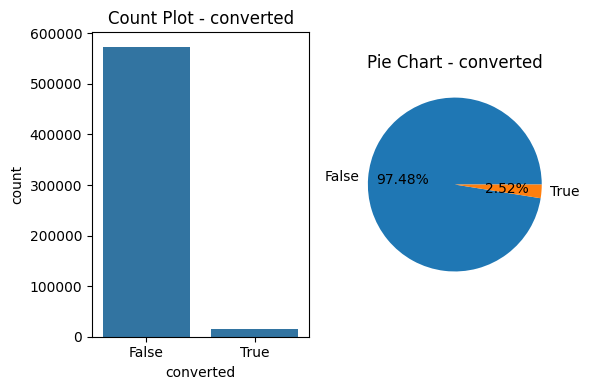

In [ ]:
variable = 'converted'
plt.figure(figsize = (6,4))
# Bar chart
plt.subplot(1,2,1)
sns.countplot( x=variable, data =df_cate)
plt.title(f'Count Plot - {variable}')

# Pie Chart
plt.subplot(1,2,2)
counts = df_cate[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust layout
plt.tight_layout()
plt.show()

Tỉ lệ chuyển đổi đang bị hạn chế, khoảng 97,5% mọi người không thực sự mua hàng

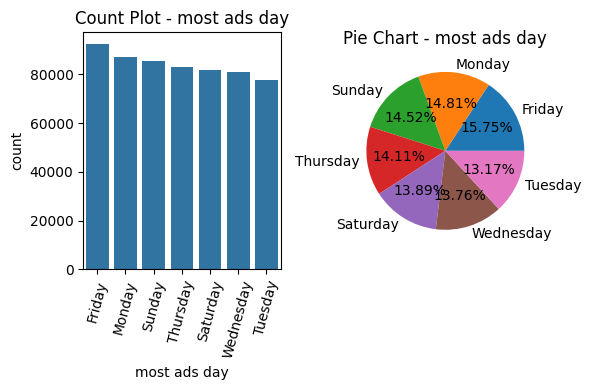

In [ ]:
variable = 'most ads day'
plt.figure(figsize = (6,4))
# Bar chart
plt.subplot(1,2,1)
sns.countplot( x=variable, data = df_cate, order = df_cate['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 75)

# Pie Chart
plt.subplot(1,2,2)
counts = df_cate[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust layout
plt.tight_layout()
plt.show()

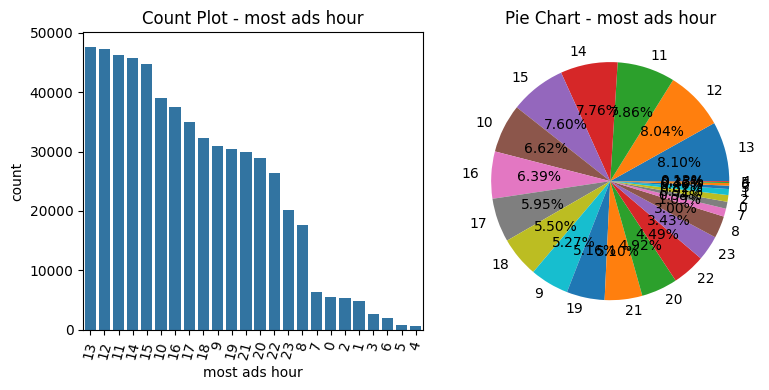

In [ ]:
variable = 'most ads hour'
plt.figure(figsize = (8,4))
# Bar chart
plt.subplot(1,2,1)
sns.countplot( x=variable, data = df_cate, order = df_cate['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 75)

# Pie Chart
plt.subplot(1,2,2)
counts = df_cate[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust layout
plt.tight_layout()
plt.show()

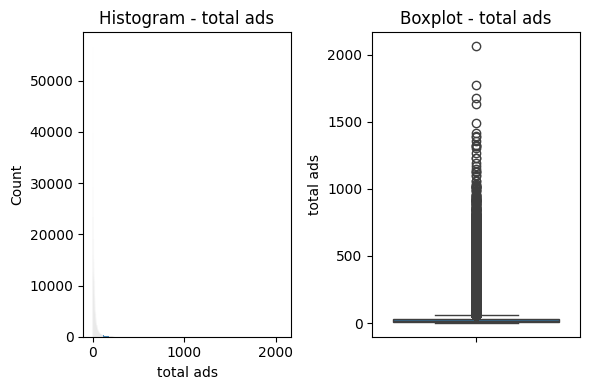

In [ ]:
variable = 'total ads'
plt.figure(figsize = (6,4))
# Histogram
plt.subplot(1,2,1)
sns.histplot( x=variable, data =df)
plt.title(f'Histogram - {variable}')

# Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f'Boxplot - {variable}')

#Adjust layout
plt.tight_layout()
plt.show()

Biểu đồ hộp bị lệch nên sẽ kiểm tra số liệu thống kê mô tả, vì có thể đang có giá trị ngoại lai

In [ ]:
#Descriptive stats of total ads
df['total ads'].describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


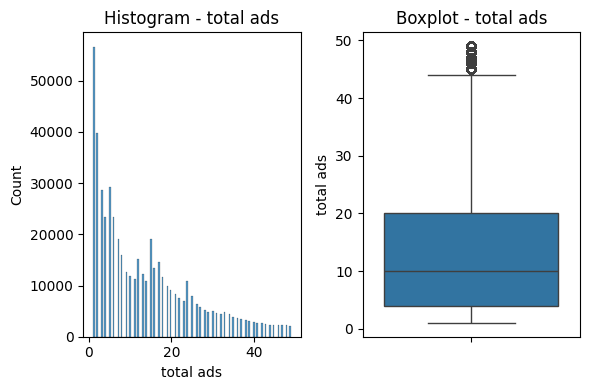

In [ ]:
variable = 'total ads'
plt.figure(figsize = (6,4))
# Histogram
plt.subplot(1,2,1)
sns.histplot( x=variable, data =df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

# Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data =df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

#Adjust layout
plt.tight_layout()
plt.show()

Med là 10 nhưng có nhiều người quảng cáo hiển thị nhiều lần hơn

# Bivariate Analysis

In [ ]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
conversion_testgroup = pd.crosstab(df['test group'],df['converted'], normalize='index')
conversion_testgroup


converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

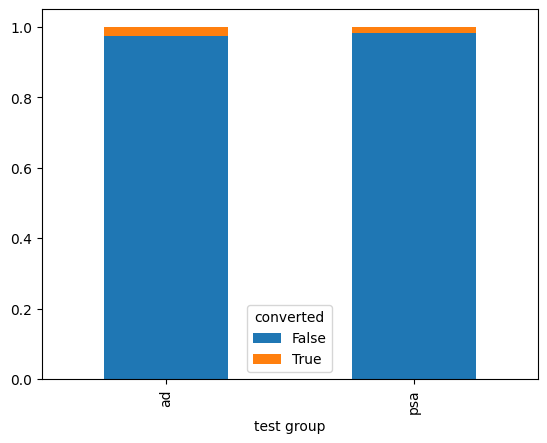

In [ ]:
# Visualize
conversion_testgroup.plot.bar(stacked = True)

Tỉ lệ chuyển đổi rất ít, nhưng với người đã xem Ad thì tỉ lệ mua tương đối nhiều hơn người chỉ xem thông điệp cộng đồng

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

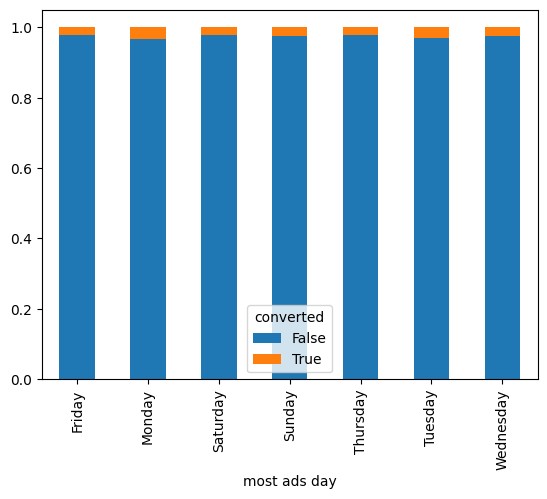

In [ ]:
conversion_day = pd.crosstab(df['most ads day'],df['converted'], normalize='index')
print(conversion_day.sort_values(by = True, ascending = False))
conversion_day.plot.bar(stacked = True)

Thứ 2 là có tỉ lệ ngày chuyển đổi cao nhất

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

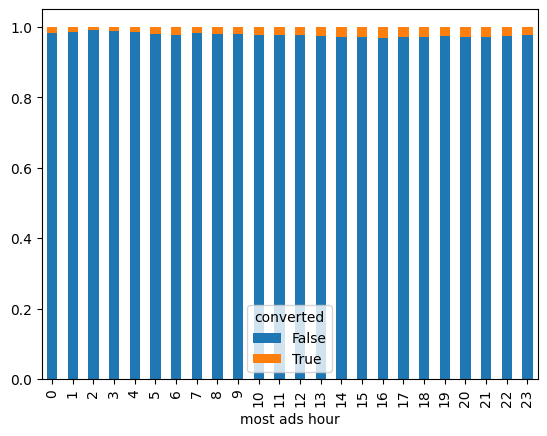

In [ ]:
conversion_hour = pd.crosstab(df['most ads hour'],df['converted'], normalize='index')
print(conversion_hour.sort_values(by = True, ascending = False))
conversion_hour.plot.bar(stacked = True)

Vào lúc 4 giờ chiều, 8 giờ tối mà 3 giờ chiều là những khung giờ có tỉ lệ chuyển đổi cao

<Axes: xlabel='converted', ylabel='total ads'>

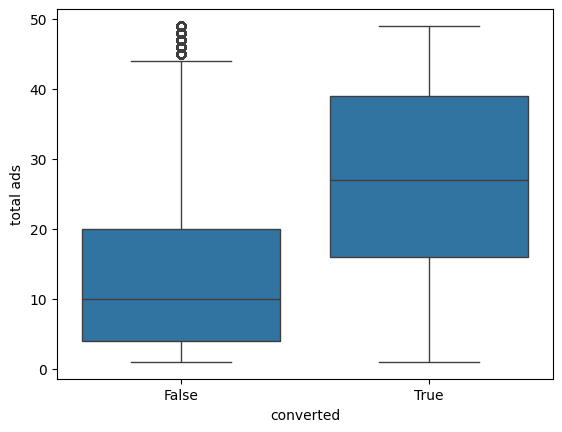

In [ ]:
sns.boxplot( x = 'converted', y = 'total ads', data = df[df['total ads'] < 50])

Đối với những người đã mua hàng, số quảng cáo trung bình họ xem là khoảng 25, còn với những người chưa mua thì trung bình quảng cáo họ xem là 10

# Statistical Tests

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cate.columns:
  if variable != 'converted':
    # Create a contigency table
    contingency_table = pd.crosstab(df_cate[variable], df_cate['converted'])

    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {variable} vs. converted" )
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")

    # Check for significance
    if p < alpha:
      print(f"The difference in conversion rates across {variable} is statistically significant.")
    else:
      print(f"There is no significant difference in conversion rates across {variable}.")


Chi-square test for test group vs. converted
Chi-square statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.
Chi-square test for most ads day vs. converted
Chi-square statistic: 410.0478857936585
P-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.
Chi-square test for most ads hour vs. converted
Chi-square statistic: 430.76869230822086
P-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


In [ ]:
df_cate.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#Step 1: Check Assumptions
# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for equality of variances: p-value = 0.0


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Step 2: Perform a Suitable Test
alpha = 0.05
if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  # If assumptions are met
  t_stat, t_p_value = ttest_ind(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
  print(f"t-test for total ads: p-value = {t_p_value}")
else:
  # Assumptions not met
  u_stat, u_p_value = mannwhitneyu(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
  print(f"Mann-Whitney U test for total ads: p-value = {u_p_value}")

Mann-Whitney U test for total ads: p-value = 0.0
